In [1]:
import pandas as pd
from pandas import DataFrame
import math
import dataset
import main
import events
import os
import numpy as np

MODE = '20m'
# SRC_DIR = 'dataset/bob_publication_data/events/swarming/preprocessed/swarming_'+ MODE
SRC_DIR = 'dataset/alright_train_'+ MODE

files = os.scandir(SRC_DIR)

In [2]:
def smooth_col(col):
    col[abs(col.diff()) > 0.3] = np.nan
    col.interpolate(method='linear', inplace=True)
    

for file in files:
    ds = pd.read_csv(file.path)
    ds = ds.bfill()
    smooth_col(ds['weight_kg'])
    smooth_col(ds['t_i_1'])
    smooth_col(ds['t_i_2'])
    smooth_col(ds['t_i_3'])
    smooth_col(ds['t_i_4'])
    
    # ds['weight_kg'][abs(ds['weight_kg'].diff()) > 0.8] = np.nan
    # ds['weight_kg'].interpolate(method='linear', inplace=True)
    # ds['t_i_1'].interpolate(method='linear', inplace=True)
    # ds['weight_kg'][abs(ds['weight_kg'].diff()) > 0.8] = np.nan
    # ds['t_i_2'].interpolate(method='linear', inplace=True)
    # ds['t_i_3'].interpolate(method='linear', inplace=True)
    # ds['t_i_4'].interpolate(method='linear', inplace=True)
    # ds['t_i_5'].interpolate(method='linear', inplace=True)

    indexes = events.get_event_indexes(ds, 'swarming.next.dif')
    print(f"{file.path}: Indexes: {indexes} / {len(ds)}")
    dataset.populate_swarming_column(ds, indexes)
    dataset.populate_delta(ds)
    dataset.populate_temp_delta(ds)
    dataset.populate_humidity_delta(ds)
    # dataset.populate_normalized(ds, 'weight_delta')
    dataset.populate_normalized(ds, 'weight_delta_percent')
    dataset.populate_normalized(ds, 'weight_delta_diff')
    dataset.populate_scaled_weight(ds)
    fd = ds

    offsets = 200
    if MODE == 'm':
        offsets = 3000
    if MODE == '5m':
        offsets = 440
    if MODE == '10m':
        offsets = 220
    if MODE == '20m':
        offsets = 80
    if MODE == 'h':
        offsets = 40

    for i in range(0, len(indexes)):
        ind = indexes[i]
        start = max(ind - offsets, 0)
        end = min(ind + offsets, len(fd))
        path = os.path.basename(file.path).replace('.csv', '')
        print(f"Saving {path}--{i}.csv")
        ffd = fd.iloc[start:end]
        os.makedirs(f"dataset/bobo/swarming_{MODE}", exist_ok=True)
        ffd.to_csv(f"dataset/bobo/swarming_{MODE}/{path}--{i}.csv", index=False)
        

dataset/alright_train_20m/76_2020-06-28 104940.csv: Indexes: [1251] / 1704


/Volumes/T7/PhD/HiveMonitor/dataset.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0013091828764831789' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i + offset, 'weight_delta_percent'] = perc_delta


Saving 76_2020-06-28 104940--0.csv
dataset/alright_train_20m/86_2021-06-06 073320.csv: Indexes: [1502, 6054] / 6552


/Volumes/T7/PhD/HiveMonitor/dataset.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.2503410020845273e-05' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i + offset, 'weight_delta_percent'] = perc_delta


Saving 86_2021-06-06 073320--0.csv
Saving 86_2021-06-06 073320--1.csv
dataset/alright_train_20m/97_2021-06-25 091320.csv: Indexes: [128, 5531] / 5816


/Volumes/T7/PhD/HiveMonitor/dataset.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.0011346604462646101' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i + offset, 'weight_delta_percent'] = perc_delta


Saving 97_2021-06-25 091320--0.csv
Saving 97_2021-06-25 091320--1.csv
dataset/alright_train_20m/105_2020-06-05 113640.csv: Indexes: [107] / 605


/Volumes/T7/PhD/HiveMonitor/dataset.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6.694029982217405e-05' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i + offset, 'weight_delta_percent'] = perc_delta


Saving 105_2020-06-05 113640--0.csv
dataset/alright_train_20m/112_2020-06-22 105240.csv: Indexes: [5605] / 6095


/Volumes/T7/PhD/HiveMonitor/dataset.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0034880497720830854' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i + offset, 'weight_delta_percent'] = perc_delta


Saving 112_2020-06-22 105240--0.csv
dataset/alright_train_20m/118_2020-06-09 142720.csv: Indexes: [977, 3227] / 3385


/Volumes/T7/PhD/HiveMonitor/dataset.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.0002244909236592633' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i + offset, 'weight_delta_percent'] = perc_delta


Saving 118_2020-06-09 142720--0.csv
Saving 118_2020-06-09 142720--1.csv
dataset/alright_train_20m/118_2021-06-13 140640.csv: Indexes: [333] / 831


/Volumes/T7/PhD/HiveMonitor/dataset.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-9.249816189536949e-05' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i + offset, 'weight_delta_percent'] = perc_delta


Saving 118_2021-06-13 140640--0.csv
dataset/alright_train_20m/119_2020-06-05 093640.csv: Indexes: [101] / 599


/Volumes/T7/PhD/HiveMonitor/dataset.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.00014148169925045796' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i + offset, 'weight_delta_percent'] = perc_delta


Saving 119_2020-06-05 093640--0.csv
dataset/alright_train_20m/128_2020-05-22 083000.csv: Indexes: [1568] / 2065


/Volumes/T7/PhD/HiveMonitor/dataset.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.003932793847566635' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i + offset, 'weight_delta_percent'] = perc_delta


Saving 128_2020-05-22 083000--0.csv


# TESTING

In [3]:
# file = f"{SRC_DIR}/86_2021-06-06 073320.csv"
col = 'weight_delta_norm'
files = os.scandir(f'dataset/bobo/swarming_{MODE}')
for file in files:
    df = pd.read_csv(file)
    # indexes = events.get_event_indexes(df, 'swarming.next.dif')
    indexes = df[df['swarming'] == 1].index
    
    # main.show_graph(df['weight_kg_scaled'], indexes, os.path.basename(file.path) + ' == ' + 'weight_kg_scaled')
    # main.show_graph(df['weight_perc_l5'], indexes, os.path.basename(file.path) + ' == ' + 'weight_perc_l5')
    main.show_graph(df['weight_kg'], indexes, os.path.basename(file.path) + ' == ' + 'weight_kg')
    # main.show_graph(df['weight_perc_l30'], indexes, os.path.basename(file.path) + ' == ' + 'weight_perc_l30')
    main.show_graph(df['h'], indexes, os.path.basename(file.path) + ' == ' + 'h')
    main.show_graph(df['t'], indexes, os.path.basename(file.path) + ' == ' + 't')
    main.show_graph(df['h_perc_l10'], indexes, os.path.basename(file.path) + ' == ' + 'h_perc_l10')
    main.show_graph(df['h_perc_l5'], indexes, os.path.basename(file.path) + ' == ' + 'h_perc_l5')
    main.show_graph(df['t_perc_l5'], indexes, os.path.basename(file.path) + ' == ' + 't_perc_l5')
    # main.show_graph(df['t'], indexes, os.path.basename(file.path) + ' == ' + 't')

    # main.show_graph(df['temp_io_diff_smart'], indexes, os.path.basename(file.path) + ' == ' + 'temp_io_diff_smart')
    # main.show_graph(df['t_i_2'], indexes, os.path.basename(file.path) + ' == ' + 't_i_2')
    # main.show_graph(df['t_i_3'], indexes, os.path.basename(file.path) + ' == ' + 't_i_3')
    # main.show_graph(df['t_i_4'], indexes, os.path.basename(file.path) + ' == ' + 't_i_4')
    # main.show_graph(df['t_i_5'], indexes, os.path.basename(file.path) + ' == ' + 't_i_5')
    # main.show_graph(df['temp_io_diff_norm'], indexes, os.path.basename(file.path) + ' == ' + 'temp_io_diff_norm')
    # main.show_graph(df['weight_delta'], indexes, os.path.basename(file.path) + ' == ' + 'weight_delta_norm')
    # main.show_graph(df['weight_delta_diff'], indexes, os.path.basename(file.path) + ' == ' + 'weight_delta_diff_norm')

    print('\n\n\n')

# file = "dataset/bobo/swarming_h/86_2021-06-06 073320--0.csv"



# if col == 'weight_kg':
#     df[col][abs(df[col].diff()) > 0.5] = np.nan
#     df[col].interpolate(method='linear', inplace=True)
# # df['weight_kg'].plot(figsize=(20,4))
# # df['weight_kg'].diff().plot(figsize=(20,4))
# main.show_graph(df[col], indexes)

TypeError: show_graph() missing 5 required positional arguments: 'queencell_indexes', 'feeding_indexes', 'honey_indexes', 'treatment_indexes', and 'died_indexes'

Indexes:  []


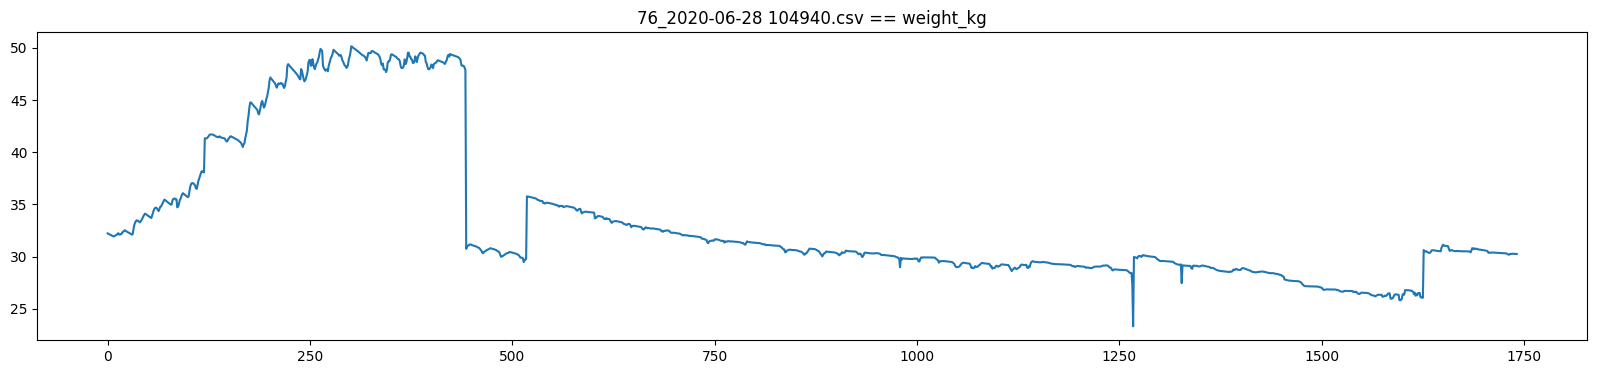

In [ ]:
df = pd.read_csv('dataset/bob_publication_data/events/not_died/preprocessed/not_died_h/17_2021-09-20 210000.csv')
indexes = events.get_event_indexes(df, 'died.next.dif')
print("Indexes: ", indexes)
# indexes = df[df['died.next.dif'] == 'NA'].index

# main.show_graph(df['weight_kg_scaled'], indexes, os.path.basename(file.path) + ' == ' + 'weight_kg_scaled')
# main.show_graph(df['weight_perc_l5'], indexes, os.path.basename(file.path) + ' == ' + 'weight_perc_l5')
main.show_graph(df['weight_kg'], indexes, os.path.basename(file.path) + ' == ' + 'weight_kg')